# Milestone 4&5

## Import libraries

Firstly, I'll import all the necessary libraries. I am going to use Numpy and Pandas mostly to complete analysis. For the visualization part, I will use pyplot subpackage of matplotlib. For implementing Machine Learning models and processing of data, I will use the sklearn library. Also I'll import warnings to filter all the warning to make the analysis looks tidy.

In [45]:
import numpy as np 
import scipy as sp 
import pandas as pd 
import matplotlib as mpl 
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from yellowbrick.classifier import ConfusionMatrix
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from scipy.stats import skew
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import scale
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from statsmodels.stats.outliers_influence import variance_inflation_factor
import dmba
from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = 'all'

## Introduction

The “letters recognition data” from the UCI machine learning repository contains summary statistics (from image analysis) of randomly-distorted English letters in 20 different fonts and each letter was randomly distorted to 20,000 unique stimuli. Each stimulus was converted into 16 primitive numerical attributes (statistical moments and edge counts) which were then scaled to fit into a range of integer values from 0 through 15.  The attibutes information shows as below:
1. lettr capital letter (26 values from A to Z)
2. x-box horizontal position of box (integer)
3. y-box vertical position of box (integer)
4. width width of box (integer)
5. high height of box (integer)
6. onpix total # on pixels (integer)
7. x-bar mean x of on pixels in box (integer)
8. y-bar mean y of on pixels in box (integer)
9. x2bar mean x variance (integer)
10. y2bar mean y variance (integer)
11. xybar mean x y correlation (integer)
12. x2ybr mean of x * x * y (integer)
13. xy2br mean of x * y * y (integer)
14. x-ege mean edge count left to right (integer)
15. xegvy correlation of x-ege with y (integer)
16. y-ege mean edge count bottom to top (integer)
17. yegvx correlation of y-ege with x (integer)

source: https://archive.ics.uci.edu/ml/datasets/Letter+Recognition

## Problem statement

I’m going to apply different machine learning models to Letter Recognition Data Set in my project. By testing different models to the data set, I can find out which model applies to this data set best. I’ll separate the data set into training data set, validation data set and test data set: 14000 for training data set, 2000 for validation data set and 4000 for test set. Then build a variety of classification models (such as SVM, MLP, KNN models) using the training data set, and use the validation data set to measure the performance of the models in order to pick the best model. After then, I’ll use the test data set to assess performance of this model. By classify these 20000 unique stimuli from 20 different fonts, we can better distinguish the 26 capital letters in the English alphabet.

## Dataset import and data processing

Now, with all the libraries we need, I will import the dataset and take a look at it. The dataset is stored in the file dataset.csv, so I'll use the pandas read_csv method to import the dataset. Also, since there is no attribute name of this csv, so I added tittle to the data phrame.

In [3]:
# Read csv file
df = pd.read_csv('/Users/liqi/Desktop/IE7275/project/letter-recognition/letter-recognition-data.csv', header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


Since this csv file do not have index, the first thing to do is to reindex the coloums. I'll use df.columns function to set the index.

In [4]:
# set index
df.columns = ['letter', 'xbox', 'ybox', 'width', 'height', 'onpix', 'xbar','ybar', 'x2bar', 
              'y2bar', 'xybar', 'x2ybar', 'xy2bar', 'xedge','xedgey', 'yedge', 'yedgex']
df

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


## Explotary Data Analysis

Now I'll apply Explotary Data Analysis to help better understand the data. I'll show the basic information of the dataset and also use some visualizations to better understand the data and then look at any processing we might want to do.

In [5]:
# List the first 5 records
df.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [6]:
# show the dimensions
print("Dimensions: ", df.shape)

Dimensions:  (20000, 17)


In [7]:
# show the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   xbox    20000 non-null  int64 
 2   ybox    20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   height  20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   xbar    20000 non-null  int64 
 7   ybar    20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybar  20000 non-null  int64 
 12  xy2bar  20000 non-null  int64 
 13  xedge   20000 non-null  int64 
 14  xedgey  20000 non-null  int64 
 15  yedge   20000 non-null  int64 
 16  yedgex  20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


In [8]:
# Check a particular column type 
print("type of column 'letter': ", df['letter'].dtype)
print("type of column 'letter': ", df['xbox'].dtype)

type of column 'letter':  object
type of column 'letter':  int64


We can see from above that all the attributes are in int64 data type excluding the firt column, it stands for the 26 letters.

In [9]:
# check missing values
df.isnull().sum()

letter    0
xbox      0
ybox      0
width     0
height    0
onpix     0
xbar      0
ybar      0
x2bar     0
y2bar     0
xybar     0
x2ybar    0
xy2bar    0
xedge     0
xedgey    0
yedge     0
yedgex    0
dtype: int64

We can see from above there is no missing values in this dataset.

In [10]:
# list all the letters
order = list(np.sort(df['letter'].unique()))
print(order, "\n")

# check the number of each letter
df_number = df.groupby(['letter']).size().sort_values(ascending = False)
print(df_number)
print(df_number.mean())

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'] 

letter
U    813
D    805
P    803
T    796
M    792
A    789
X    787
Y    786
Q    783
N    783
F    775
G    773
E    768
B    766
V    764
L    761
R    758
I    755
O    753
W    752
S    748
J    747
K    739
C    736
H    734
Z    734
dtype: int64
769.2307692307693


We can see that after list all the letters and sort them in descending order, the most common letter in this data set is U, which has 813 records, followed by D P T M A, and the least letter is Z, which has 734 records. Also, the mean record of the letters is about 769.

In [11]:
# caculate the mean of each attribute group by every letter
df_mean = df.groupby('letter').mean().round(3)
df_mean.head()

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
letter,,,,,,,,,,,,,,,,
A,3.337,6.976,5.128,5.179,2.991,8.852,3.631,2.755,2.043,7.802,2.338,8.465,2.772,6.322,2.876,7.469
B,3.986,6.962,5.089,5.170,4.597,7.671,7.063,5.367,5.572,7.954,5.507,6.653,3.117,7.919,6.612,9.101
C,4.031,7.064,4.701,5.296,2.776,5.438,7.628,5.928,7.178,8.773,7.495,11.947,1.992,8.876,4.080,8.556
D,4.024,7.245,5.170,5.288,4.026,7.539,6.806,5.922,6.508,8.166,5.112,5.750,3.365,7.814,3.971,7.629
E,3.728,6.944,4.757,5.202,3.680,5.966,7.353,4.224,7.586,8.508,6.242,10.341,2.128,8.298,6.022,8.507


In [12]:
# sorted the dataframe calculated above by 'height'
df_sorted = df_mean.sort_values( by ='height')
df_sorted.head()

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
letter,,,,,,,,,,,,,,,,
B,3.986,6.962,5.089,5.170,4.597,7.671,7.063,5.367,5.572,7.954,5.507,6.653,3.117,7.919,6.612,9.101
A,3.337,6.976,5.128,5.179,2.991,8.852,3.631,2.755,2.043,7.802,2.338,8.465,2.772,6.322,2.876,7.469
T,3.996,7.126,4.820,5.193,2.858,6.428,11.369,2.557,6.515,8.820,9.317,6.707,1.601,9.686,2.278,6.300
H,4.331,6.845,5.785,5.193,4.253,7.345,7.320,6.703,4.281,8.045,5.899,7.801,3.862,8.048,3.095,7.858
E,3.728,6.944,4.757,5.202,3.680,5.966,7.353,4.224,7.586,8.508,6.242,10.341,2.128,8.298,6.022,8.507


In [13]:
# find the attribute correlations
df_corr = df.corr(method = 'pearson').round(3)
df_corr

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
xbox,1.000,0.758,0.852,0.673,0.619,-0.033,0.046,0.014,0.052,0.148,0.035,-0.046,0.489,0.098,0.274,-0.105
ybox,0.758,1.000,0.672,0.823,0.555,0.046,-0.041,-0.025,0.096,0.160,-0.055,-0.008,0.274,-0.001,0.231,-0.043
width,0.852,0.672,1.000,0.660,0.766,0.062,0.025,-0.099,0.057,0.115,0.012,-0.045,0.557,0.046,0.260,-0.118
height,0.673,0.823,0.660,1.000,0.644,0.043,-0.020,0.082,0.059,0.012,-0.012,0.026,0.265,0.025,0.298,-0.019
onpix,0.619,0.555,0.766,0.644,1.000,0.139,-0.029,-0.012,-0.066,-0.070,-0.073,-0.039,0.628,0.018,0.493,-0.063
xbar,-0.033,0.046,0.062,0.043,0.139,1.000,-0.357,-0.053,-0.123,0.086,-0.342,-0.032,0.144,-0.253,0.127,0.249
ybar,0.046,-0.041,0.025,-0.020,-0.029,-0.357,1.000,-0.119,-0.050,0.178,0.600,-0.272,-0.037,0.555,-0.078,-0.208
x2bar,0.014,-0.025,-0.099,0.082,-0.012,-0.053,-0.119,1.000,-0.188,-0.318,0.043,0.082,0.142,-0.085,0.007,0.183
y2bar,0.052,0.096,0.057,0.059,-0.066,-0.123,-0.050,-0.188,1.000,0.132,-0.060,0.119,-0.384,-0.053,0.278,-0.061
xybar,0.148,0.160,0.115,0.012,-0.070,0.086,0.178,-0.318,0.132,1.000,0.058,-0.107,-0.176,0.029,-0.087,-0.114


In [14]:
# show the attribute correlations of each letter by heatmap
plt.figure(figsize=(9, 6))
#plt.figure(figsize = (10,7))
sns.heatmap(df_corr, xticklabels = df_corr.columns, yticklabels = df_corr.columns, annot = True, 
            fmt = ".2f", cmap = "RdBu", center = 0)

<AxesSubplot: >

We can see from the above figure that xbox and ybox have a correlation of 0.76, xbox and width have a correlation of 0.85,xbox and height have a correlation of 0.67, xbox and onpix have a correlation of 0.62. Also, ybox and width have a correlation at 0.67, ybox and height have a correlation at 0.82, ybox and onpix have a correlation at 0.56. Width and height have a correlation at 0.66, width and onpix have a correlation at 0.77. Height and onpix have a correlation at 0.64. Apart from these, other attributes seem do not have strong correlations. However, since these attibutes should all be used in the following analysis to distinguish the letters, even though some of them have strong correlations, we should not remove any attributes.

In [15]:
# show how various attributes vary with letters by barplot
plt.figure(figsize = (8, 5))
sns.barplot(x = 'letter', y = 'xbox', data = df, order = order)

<AxesSubplot: xlabel='letter', ylabel='xbox'>

In [16]:
plt.figure(figsize = (8, 5))
sns.barplot(x = 'letter', y = 'height', data = df, order = order)

<AxesSubplot: xlabel='letter', ylabel='height'>

In [17]:
plt.figure(figsize = (8, 5))
sns.barplot(x = 'letter', y = 'xybar', data = df, order = order)

<AxesSubplot: xlabel='letter', ylabel='xybar'>

I use barplot to show the relationship between letter and xbox; letter and height; and letter and xybar. We can see from the plot that the distribution of each letter is almost even, but in terms of xbox, letter 'I' is smaller than other letters, in terms of xybar, letter 'L' is smaller than other letters.

In [18]:
# take a look at the histograms of each variable.
df.hist(figsize = (10, 8.5))

array([[<AxesSubplot: title={'center': 'xbox'}>,
        <AxesSubplot: title={'center': 'ybox'}>,
        <AxesSubplot: title={'center': 'width'}>,
        <AxesSubplot: title={'center': 'height'}>],
       [<AxesSubplot: title={'center': 'onpix'}>,
        <AxesSubplot: title={'center': 'xbar'}>,
        <AxesSubplot: title={'center': 'ybar'}>,
        <AxesSubplot: title={'center': 'x2bar'}>],
       [<AxesSubplot: title={'center': 'y2bar'}>,
        <AxesSubplot: title={'center': 'xybar'}>,
        <AxesSubplot: title={'center': 'x2ybar'}>,
        <AxesSubplot: title={'center': 'xy2bar'}>],
       [<AxesSubplot: title={'center': 'xedge'}>,
        <AxesSubplot: title={'center': 'xedgey'}>,
        <AxesSubplot: title={'center': 'yedge'}>,
        <AxesSubplot: title={'center': 'yedgex'}>]], dtype=object)

I use histogram to show the distribution of each variable. We can see from the plot that the distribution of each variable varies a lot: 
xbox, ybox, width, and height variables have a relatively normal distribution, indicating that the data is well-distributed and has a moderate range of values.
onpix variable shows that most letters have a smaller number of on pixels in comparison to others, but some letters have a higher number of on pixels. 
xbar and ybar variables suggest that most letters are vertically symmetrical and horizontally asymmetrical. 
x2bar and y2bar variables indicate that most letters have a similar distribution of pixels on the left and right sides. 
xybar, x2ybar, and xy2bar variables suggest that most letters are not diagonally symmetrical, and their pixels are concentrated in the middle of the box.
xedge and yedge variables show that most letters have few edges.
xedgey and yedgex variables suggest that most letters have edges at the top and bottom of the box.

## Feature Selection

In [39]:
# Multicollinearity
X = df.drop('letter', 1)
df['letter'].replace(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'],
                     [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26], inplace = True)
y = df['letter']
X

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [40]:
# Multicollinearity
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

   feature        VIF
0     xbox  32.497363
1     ybox  25.037823
2    width  50.122285
3   height  29.237851
4    onpix  18.778933
5     xbar  15.991639
6     ybar  24.337883
7    x2bar   4.907746
8    y2bar   8.579459
9    xybar  15.573648
10  x2ybar  15.315314
11  xy2bar  18.159085
12   xedge   7.876362
13  xedgey  38.433826
14   yedge   6.068372
15  yedgex  28.663025


In [41]:
# Correlation analysis
cor = df.corr()
plt.figure(figsize = (12,8))
sns.heatmap(data = cor, annot = True)

<AxesSubplot: >

In [46]:
#Backward Elimination
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
selected_features_BE

['xbox',
 'ybox',
 'width',
 'height',
 'onpix',
 'xbar',
 'ybar',
 'x2bar',
 'y2bar',
 'xybar',
 'x2ybar',
 'xy2bar',
 'xedge',
 'xedgey',
 'yedge',
 'yedgex']

In [47]:
# Forward feature selection

def train_model(variables):
    if len(variables) == 0:
        return None
    model = LinearRegression()
    model.fit(X[variables], y)
    return model

def score_model(model, variables):
    if len(variables) == 0:
        return AIC_score(y, [y.mean()] * len(y), model, df = 1)
    return AIC_score(y, model.predict(X[variables]), model)

best_model, best_variables = forward_selection(X.columns, train_model, score_model, verbose = True)

print(best_variables)

Variables: xbox, ybox, width, height, onpix, xbar, ybar, x2bar, y2bar, xybar, x2ybar, xy2bar, xedge, xedgey, yedge, yedgex
Start: score=137368.26, constant
Step: score=134081.06, add x2ybar
Step: score=133423.68, add xy2bar
Step: score=133076.62, add xybar
Step: score=132437.75, add x2bar
Step: score=132114.52, add xbox
Step: score=131829.79, add xbar
Step: score=131515.24, add onpix
Step: score=131282.96, add xedgey
Step: score=131193.44, add yedgex
Step: score=131114.92, add y2bar
Step: score=130989.39, add xedge
Step: score=130908.20, add ybar
Step: score=130840.56, add height
Step: score=130694.36, add ybox
Step: score=130677.95, add yedge
Step: score=130656.31, add width
Step: score=130656.31, add None
['x2ybar', 'xy2bar', 'xybar', 'x2bar', 'xbox', 'xbar', 'onpix', 'xedgey', 'yedgex', 'y2bar', 'xedge', 'ybar', 'height', 'ybox', 'yedge', 'width']


In [48]:
# Lasso
regLasso = LassoCV()
regLasso.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % regLasso.alpha_)
print("Best score using built-in LassoCV: %f" %regLasso.score(X,y))
coef = pd.Series(regLasso.coef_, index = X.columns)

Best alpha using built-in LassoCV: 0.007686
Best score using built-in LassoCV: 0.286222


In [49]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")
print(coef)

Lasso picked 16 variables and eliminated the other 0 variables
xbox      0.531781
ybox     -0.316800
width     0.274963
height    0.566259
onpix    -1.049502
xbar      0.604025
ybar      0.227321
x2bar    -0.449841
y2bar     0.264652
xybar    -0.633706
x2ybar    0.936840
xy2bar   -0.460515
xedge     0.461270
xedgey    0.546913
yedge     0.132196
yedgex   -0.306901
dtype: float64


## Feature Selection

In [50]:
# variable transformations: use numbers to replace letters
df['letter'].replace(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'],
                     [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26], inplace = True)
df

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,20,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,9,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,4,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,14,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,7,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,4,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,3,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,20,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,19,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'xbox'),
  Text(1, 0, 'ybox'),
  Text(2, 0, 'width'),
  Text(3, 0, 'height'),
  Text(4, 0, 'onpix'),
  Text(5, 0, 'xbar'),
  Text(6, 0, 'ybar'),
  Text(7, 0, 'x2bar'),
  Text(8, 0, 'y2bar'),
  Text(9, 0, 'xybar'),
  Text(10, 0, 'x2ybar'),
  Text(11, 0, 'xy2bar'),
  Text(12, 0, 'xedge'),
  Text(13, 0, 'xedgey'),
  Text(14, 0, 'yedge'),
  Text(15, 0, 'yedgex')])

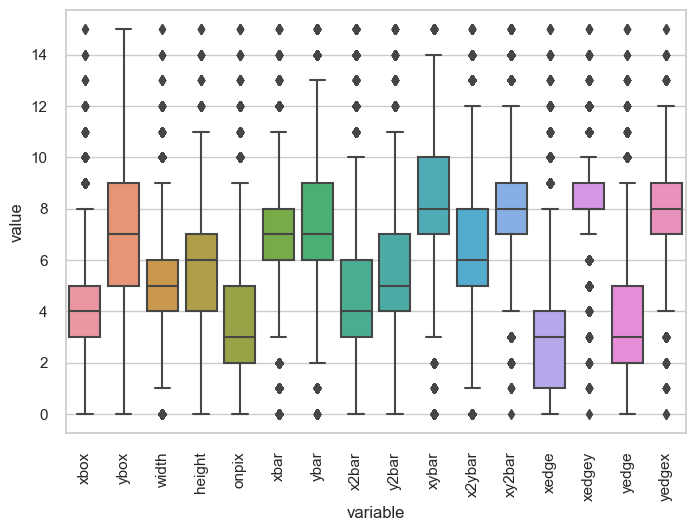

In [51]:
# using boxplot to give an overview of the outliers
sns.boxplot(x='variable', y='value', data = pd.melt(df.iloc[:,1:]))
plt.xticks(rotation=90)

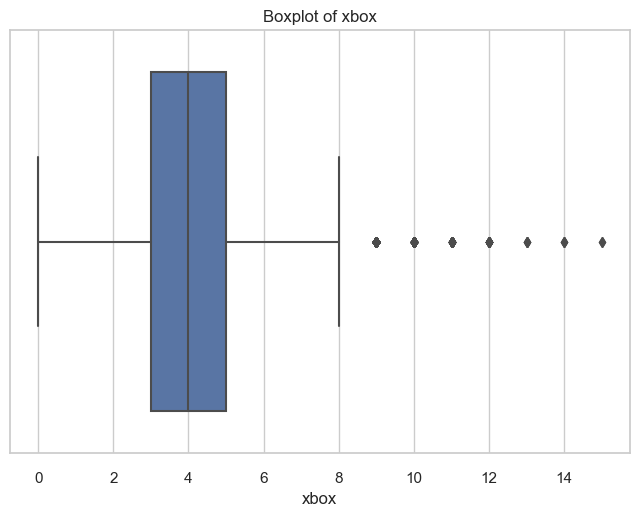

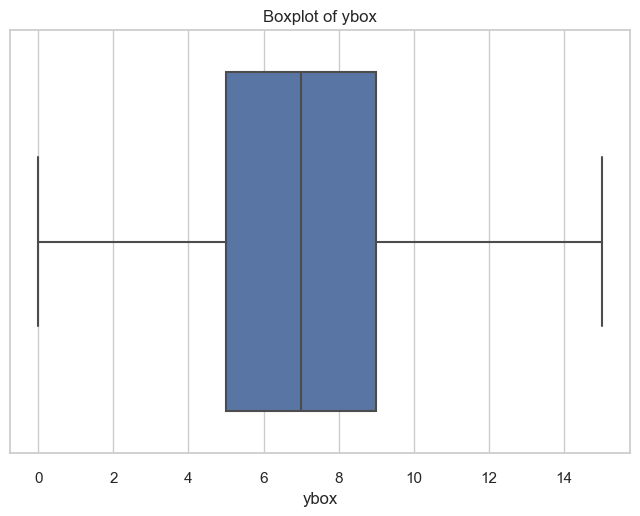

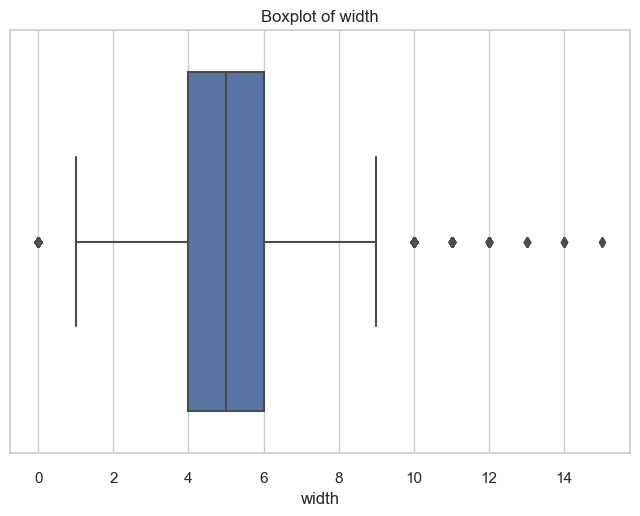

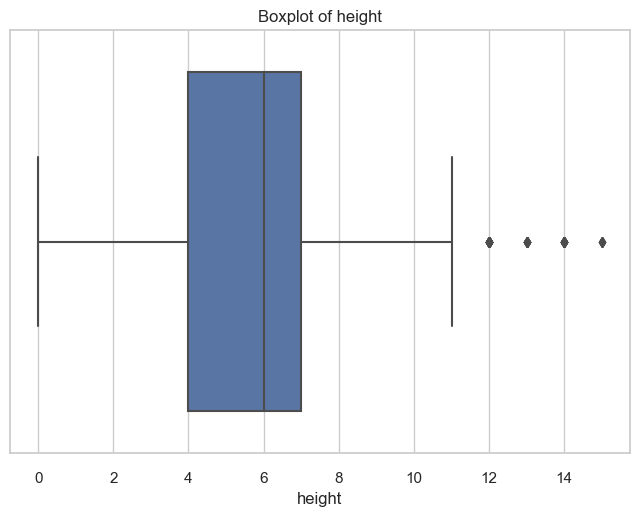

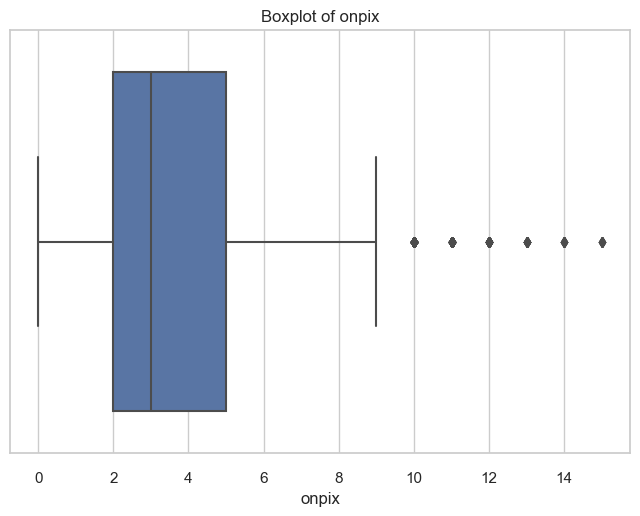

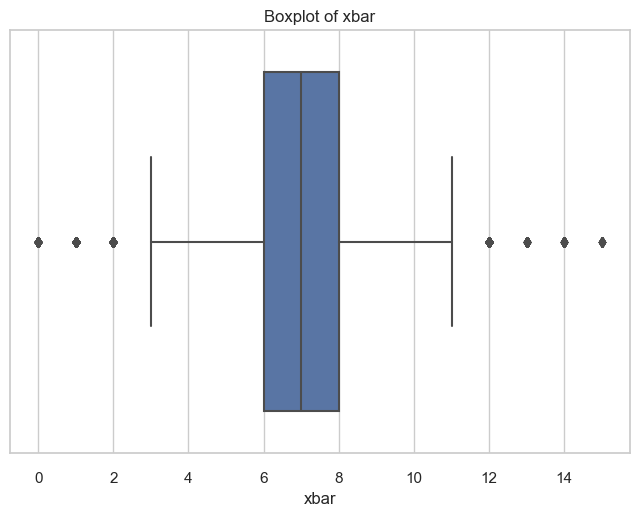

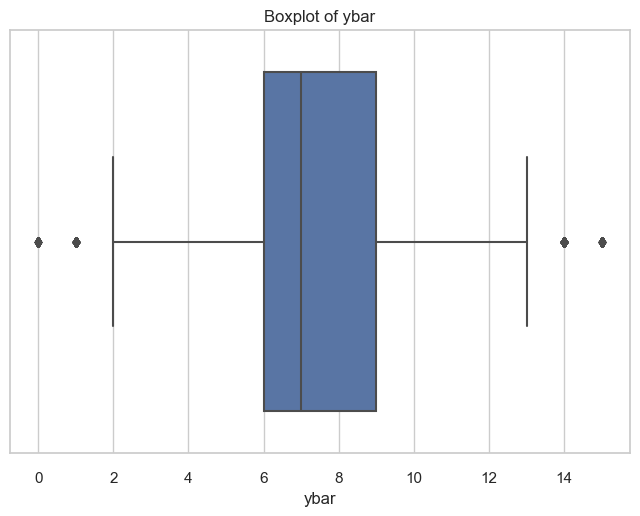

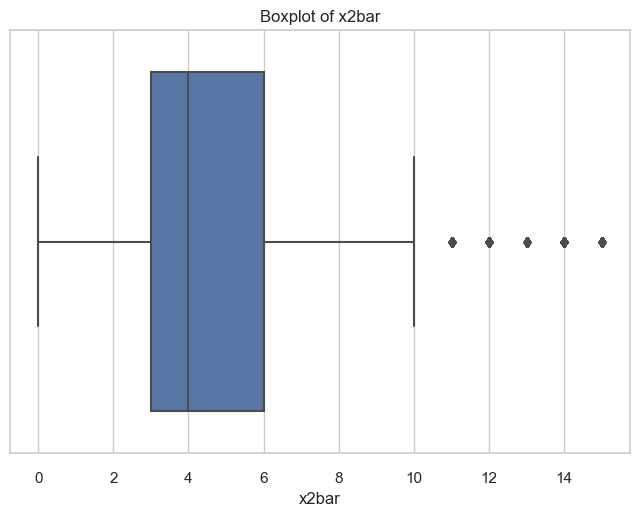

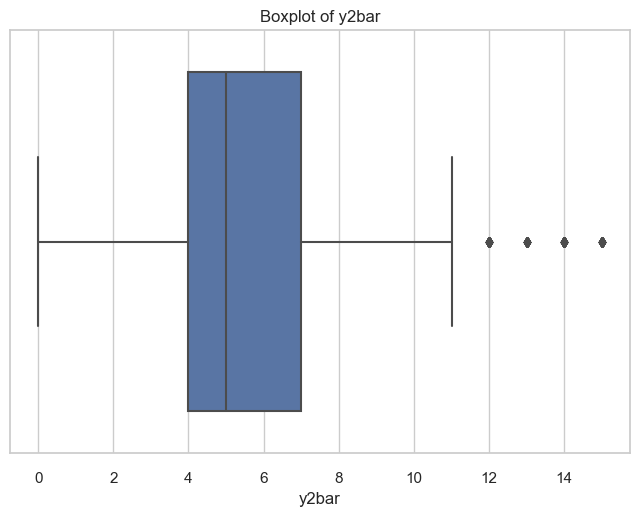

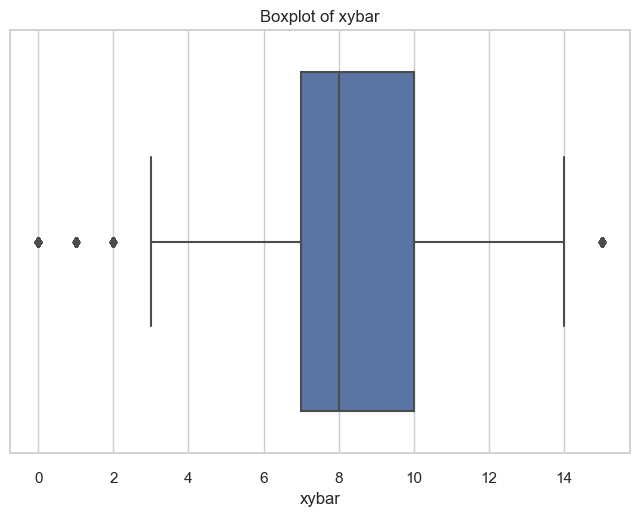

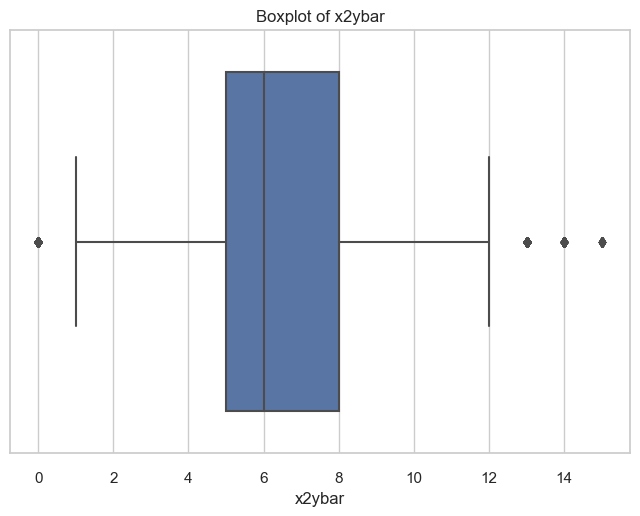

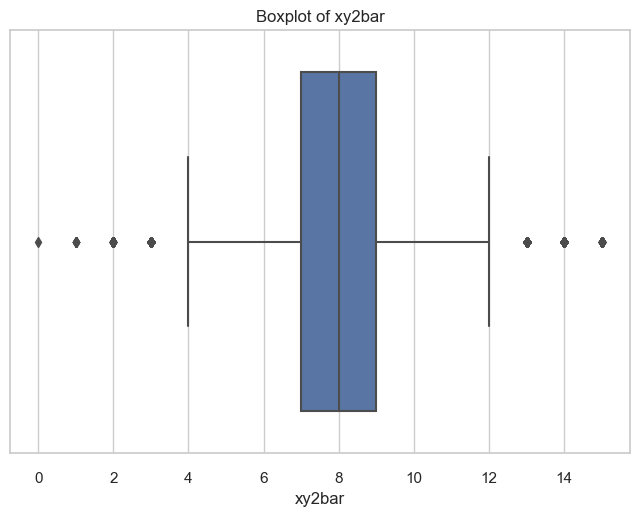

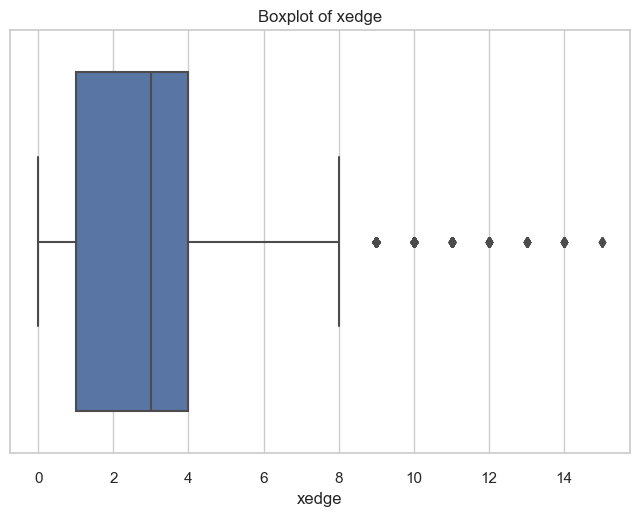

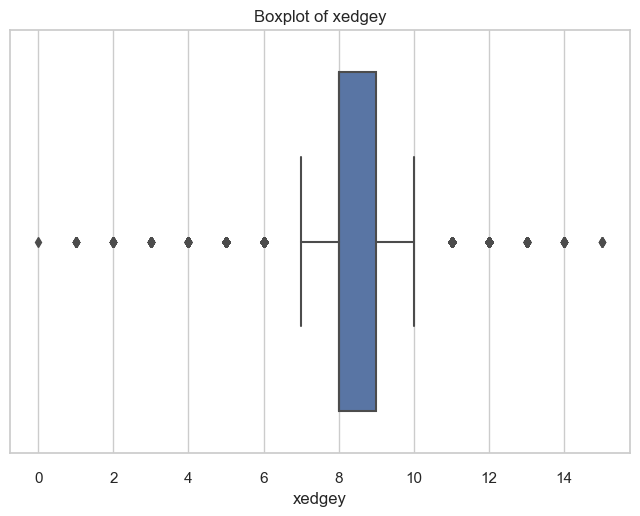

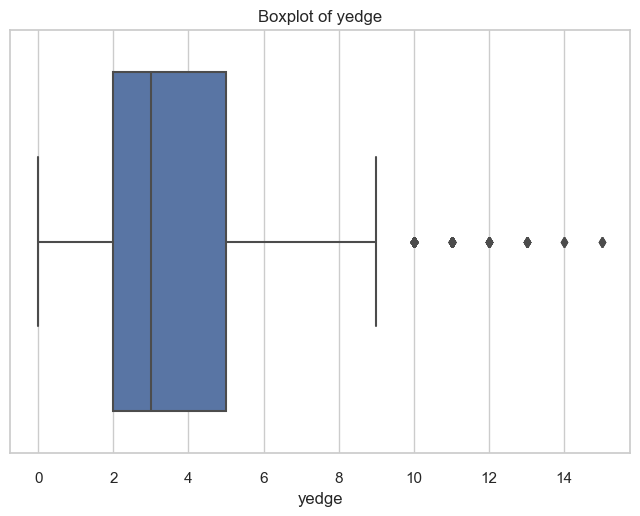

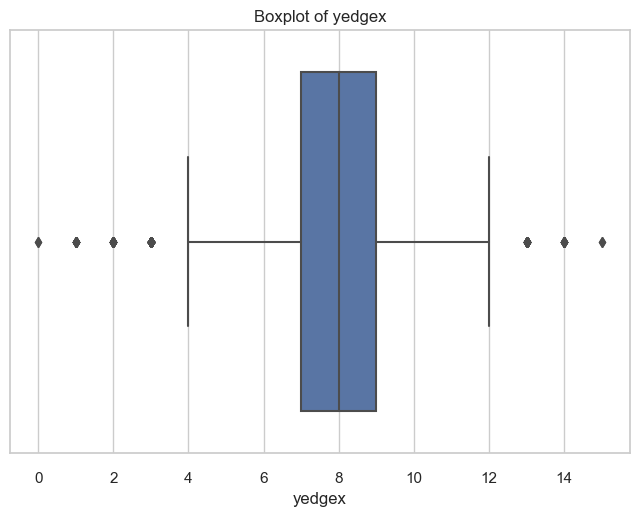

In [52]:
# use boxplots to find the outliers in every attribute 
sns.set_theme(style="whitegrid")
for col in df.columns[1:]:
    plt.figure()
    sns.boxplot(x = df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

## Modeling and Model evaluation

### 1. SVC

In [53]:
# splitting into X and y
X = df.drop("letter", axis = 1)
y = df['letter']

# scaling the features
X_scaled = scale(X)

# train test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.4, random_state=10)

In [54]:
# linear model

model_linear = SVC(kernel='linear')
model_linear.fit(X_train, y_train)

# predict
y_pred = model_linear.predict(X_test)

In [55]:
# confusion matrix and accuracy

# accuracy
print("Accuracy of SVC model:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred))

# cm
cm = ConfusionMatrix(model_linear)

# predict the responses for test dataset
predictions = cm.predict(X_test)

Accuracy of SVC model: 0.848125


In [56]:
print(classification_report(y_test, predictions, digits=5))

              precision    recall  f1-score   support

           1    0.86726   0.94231   0.90323       312
           2    0.77219   0.87879   0.82205       297
           3    0.88959   0.84431   0.86636       334
           4    0.81337   0.88485   0.84761       330
           5    0.76923   0.85526   0.80997       304
           6    0.81877   0.84615   0.83224       299
           7    0.74041   0.78931   0.76408       318
           8    0.70480   0.62623   0.66319       305
           9    0.89899   0.87255   0.88557       306
          10    0.86594   0.86909   0.86751       275
          11    0.80000   0.82155   0.81063       297
          12    0.91450   0.85121   0.88172       289
          13    0.92233   0.93750   0.92985       304
          14    0.91216   0.91525   0.91371       295
          15    0.84173   0.76721   0.80274       305
          16    0.94326   0.82866   0.88226       321
          17    0.83946   0.80707   0.82295       311
          18    0.76875   0

#### hyperparameter

In [82]:
# define the parameter grid
param_grid = {'C': [0.1, 1, 10, 100]}

# create a GridSearchCV object
grid_search = GridSearchCV(SVC(kernel='linear'), param_grid, cv=5, scoring='accuracy')

# fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# print the best parameter and best score
print("Best parameter: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)


Best parameter:  {'C': 1}
Best score:  0.9995


### 2. Decision Tree

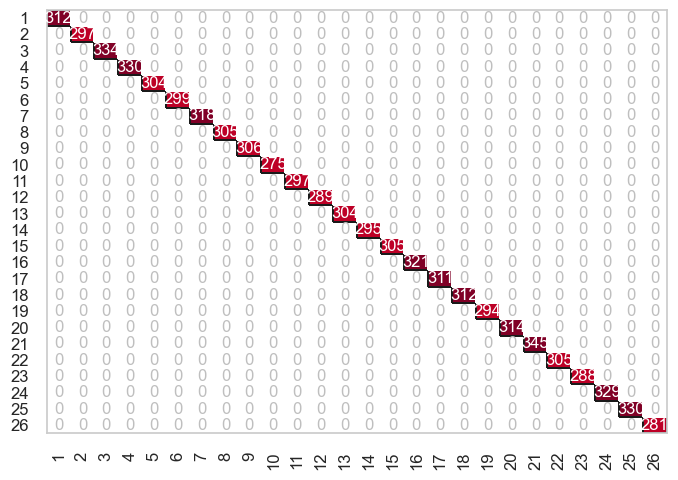

In [57]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size = 0.4, random_state=10)

# Create Decision Tree Classifier
dec_tree = DecisionTreeClassifier()
cm1 = ConfusionMatrix(dec_tree)

# train the model using the training sets
cm1.fit(X_train, y_train)
cm1.score(X_test, y_test)

# predict the responses for test dataset
predictions = cm1.predict(X_test)

In [58]:
# accuracy classification score
print("Accuracy of Decision Tree model: ", accuracy_score(y_test, predictions))

Accuracy of Decision Tree model:  1.0


In [59]:
# compute confusion matrix
print(confusion_matrix(y_test, predictions))

[[312   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0 297   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0 334   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0   0 330   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0   0   0 304   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0   0   0   0 299   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 318   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 305   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 306   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0   0   0  

In [60]:
# text report showing the main classification metrics
print(classification_report(y_test, predictions, digits=5))

              precision    recall  f1-score   support

           1    1.00000   1.00000   1.00000       312
           2    1.00000   1.00000   1.00000       297
           3    1.00000   1.00000   1.00000       334
           4    1.00000   1.00000   1.00000       330
           5    1.00000   1.00000   1.00000       304
           6    1.00000   1.00000   1.00000       299
           7    1.00000   1.00000   1.00000       318
           8    1.00000   1.00000   1.00000       305
           9    1.00000   1.00000   1.00000       306
          10    1.00000   1.00000   1.00000       275
          11    1.00000   1.00000   1.00000       297
          12    1.00000   1.00000   1.00000       289
          13    1.00000   1.00000   1.00000       304
          14    1.00000   1.00000   1.00000       295
          15    1.00000   1.00000   1.00000       305
          16    1.00000   1.00000   1.00000       321
          17    1.00000   1.00000   1.00000       311
          18    1.00000   1

#### hyperparameter

Best max_depth: 10
Best min_samples_leaf: 1
Best cross-validation score: 0.9856666666666666
Test set accuracy: 1.0


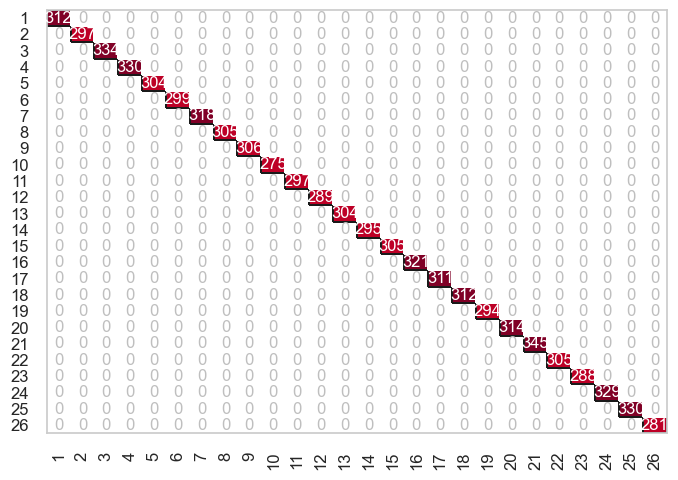

In [80]:
# Define the hyperparameters to tune
hyperparameters = {'max_depth': [2, 4, 6, 8, 10],
                   'min_samples_leaf': [1, 2, 3, 4, 5]}

# Create the decision tree classifier object
dec_tree = DecisionTreeClassifier()

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(estimator=dec_tree, param_grid=hyperparameters, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding mean cross-validation score
print('Best max_depth:', grid_search.best_estimator_.get_params()['max_depth'])
print('Best min_samples_leaf:', grid_search.best_estimator_.get_params()['min_samples_leaf'])
print('Best cross-validation score:', grid_search.best_score_)

# Evaluate the model performance on the test set using the best hyperparameters
best_dec_tree = grid_search.best_estimator_
cm = ConfusionMatrix(best_dec_tree)
cm.fit(X_train, y_train)
score = cm.score(X_test, y_test)
print('Test set accuracy:', score)


### 3. KNN model

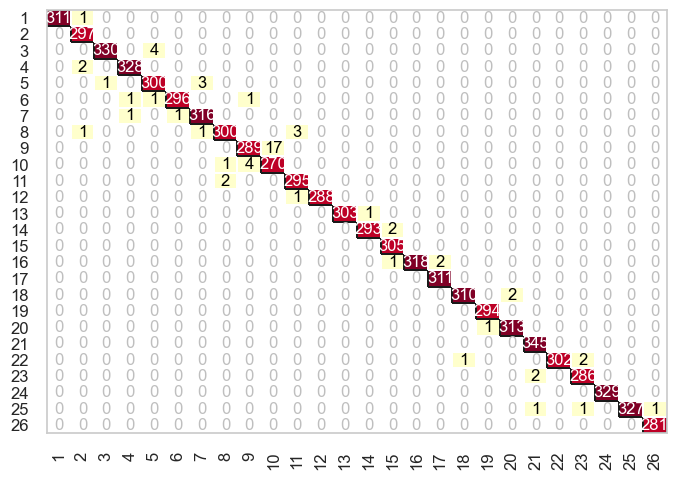

In [65]:
# Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5, metric='manhattan', algorithm='auto', weights='distance', n_jobs=-1)
cm2 = ConfusionMatrix(knn)

# train the model using the training sets
cm2.fit(X_train, y_train)
cm2.score(X_test, y_test)

# predict the responses for test dataset
predictions = cm2.predict(X_test)

In [66]:
# accuracy classification score
print("Accuracy of KNN model: ", accuracy_score(y_test, predictions))

Accuracy of KNN model:  0.992125


In [67]:
# compute confusion matrix
print(confusion_matrix(y_test, predictions))

[[311   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0 297   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0 330   0   4   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   2   0 328   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0   1   0 300   0   3   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0   0   1   1 296   0   0   1   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0   0   1   0   1 316   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   1   0   0   0   0   1 300   0   0   3   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 289  17   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0   0   0  

In [68]:
# text report showing the main classification metrics
print(classification_report(y_test, predictions, digits=5))

              precision    recall  f1-score   support

           1    1.00000   0.99679   0.99839       312
           2    0.98671   1.00000   0.99331       297
           3    0.99698   0.98802   0.99248       334
           4    0.99394   0.99394   0.99394       330
           5    0.98361   0.98684   0.98522       304
           6    0.99663   0.98997   0.99329       299
           7    0.98750   0.99371   0.99060       318
           8    0.99010   0.98361   0.98684       305
           9    0.98299   0.94444   0.96333       306
          10    0.94077   0.98182   0.96085       275
          11    0.98662   0.99327   0.98993       297
          12    1.00000   0.99654   0.99827       289
          13    1.00000   0.99671   0.99835       304
          14    0.99660   0.99322   0.99491       295
          15    0.99026   1.00000   0.99511       305
          16    1.00000   0.99065   0.99531       321
          17    0.99361   1.00000   0.99679       311
          18    0.99678   0

#### Perform hyperparameter tuning

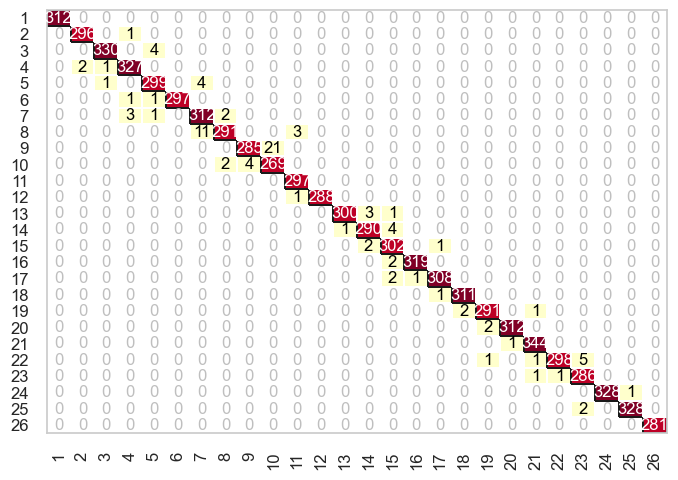

In [73]:
# Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=7, metric='minkowski', algorithm='ball_tree', weights='uniform', n_jobs=-1)
cm2 = ConfusionMatrix(knn)

# train the model using the training sets
cm2.fit(X_train, y_train)
cm2.score(X_test, y_test)

# predict the responses for test dataset
predictions = cm2.predict(X_test)

In [75]:
# accuracy classification score
print("Accuracy of KNN model: ", accuracy_score(y_test, predictions))

Accuracy of KNN model:  0.987625


In [76]:
# compute confusion matrix
print(confusion_matrix(y_test, predictions))

[[312   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0 296   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0 330   0   4   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   2   1 327   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0   1   0 299   0   4   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0   0   1   1 297   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0   0   3   1   0 312   2   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  11 291   0   0   3   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 285  21   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0   0   0  

In [77]:
# text report showing the main classification metrics
print(classification_report(y_test, predictions, digits=5))


              precision    recall  f1-score   support

           1    1.00000   1.00000   1.00000       312
           2    0.99329   0.99663   0.99496       297
           3    0.99398   0.98802   0.99099       334
           4    0.98494   0.99091   0.98792       330
           5    0.98033   0.98355   0.98194       304
           6    1.00000   0.99331   0.99664       299
           7    0.95413   0.98113   0.96744       318
           8    0.98644   0.95410   0.97000       305
           9    0.98616   0.93137   0.95798       306
          10    0.92759   0.97818   0.95221       275
          11    0.98671   1.00000   0.99331       297
          12    1.00000   0.99654   0.99827       289
          13    0.99668   0.98684   0.99174       304
          14    0.98305   0.98305   0.98305       295
          15    0.97106   0.99016   0.98052       305
          16    0.99687   0.99377   0.99532       321
          17    0.99355   0.99035   0.99195       311
          18    0.99361   0